## ASSIGNMENT - 1 - Market Prices Data of Tomato

## Import Statements

In [65]:
#author : Akshay Tomar (AK357172)
#date : Mar 20, 2017
#task : Assignment 1 - Data Munging Assignment


#import statements - libs
%matplotlib inline
import pandas as pd
import numpy as np
from lxml import etree
import matplotlib.pyplot as plt

In [66]:
filename = ["Tomato_2014.xml", "Tomato_2015.xml", "Tomato_2016.xml"]

## Function to parse and extract root node from XML 

In [73]:
def ret_root(file):
    tree = etree.parse(file)
    root = tree.getroot()
    return root

## Function to return list of headers - Helper function for getdf

In [74]:
#func name as h_temp():
def h_temp(file, root):
    list_main = []
    list_headers = root.findall(".//*[@name='Table']")[0].getchildren()[0].getchildren()[0].getchildren()
    htemp = []
    for item in list_headers:
        htemp.append(item.values()[0])
    return htemp

## Function to return XML data as a DataFrame

In [75]:
def get_df(root, h_temp):
    list_main = []
    list_values = root.findall(".//*[NewDataSet]")[0].getchildren()[0].getchildren()
    n_tables = (len(list_values))
    n_items = len(list_values[0].getchildren())
    for tab in range(n_tables):
        q_temp=[]
        for item in range(n_items):
            q_temp.append(list_values[tab].getchildren()[item].text)
        list_main.append(q_temp)
    df = pd.DataFrame(data=list_main, columns=h_temp)
    return df

## Function to return combined DataFrame for all xml files

In [76]:
def get_combined_df(dframe, filename):
    for file in filename:
        root = ret_root(file)
        h_temp_ = h_temp(file, root)
        df_ = get_df(root, h_temp_)
        dframe = dframe.append(df_, ignore_index=True)
    return dframe

## Helper function for changeDTime

In [77]:
def dec_season(val):
    if ((val > 4) & (val < 8)):
        temp = "Summer"
        return temp
    elif ((val > 7) & (val < 11)):
        temp = "Autumn"
        return temp
    elif ((val>10) | (val<2)):
        temp = "Winter"
        return temp
    else:
        temp = "Spring"
        return temp  

## Function to add Day, Month, Year & Seasons columns to DataFrame

In [78]:
def change_dtime(df):
    A_time = pd.to_datetime(pd.Series(df["Arrival_Date"]), dayfirst = True)
    df['Day'] = A_time.dt.day
    df['Month'] = A_time.dt.month
    df['Year'] = A_time.dt.year
    df['Season'] = df['Month'].apply(decSeason)
    return df

In [79]:
root = ret_root(filename[0])
htemp = h_temp(filename[0], root)
df = pd.DataFrame(columns=htemp)

In [80]:
df = get_combined_df(df, filename)

## Creating DataFrame for Ques1

In [81]:
df_q1 = df[(df["Market"] == "Kalikiri") & (df["Commodity"] == "Tomato")]
df_q1.is_copy = False
df_q1 = changeDTime(df_q1)
df_q1 = df_q1[(df_q1["Month"] == 1) & (df_q1["Year"] == 2014)]

## Creating DataFrame for Ques2

In [82]:
df_q2 = df[df["State"] == "Andhra Pradesh"]
df_q2.is_copy = False

In [83]:
df_q2 = changeDTime(df_q2)

## Function for creating graph for Ques-1

In [84]:
def q1(df_kal):
    ad = list(df_kal["Arrival_Date"])
    ar = list(df_kal["Arrival_Date"].index)
    min_price = df_kal["Min_x0020_Price"]
    max_price = df_kal["Max_x0020_Price"]
    modal_price = df_kal["Modal_x0020_Price"]
    plt.xlabel("Dates")
    plt.ylabel("Prices")
    plt.xticks(ar, ad, rotation=90)
    plt.title("Market Prices Data of Tomato - for Jan 2014 only")
    l1 = plt.plot(min_price, label = "Min Price")
    l2 = plt.plot(max_price, label = "Max Price")
    l3 = plt.plot(modal_price, label = "Modal Price")
    fig_size=[12,9]
    plt.legend()
    plt.rcParams["figure.figsize"] = fig_size
    plt.tight_layout()
    plt.show()

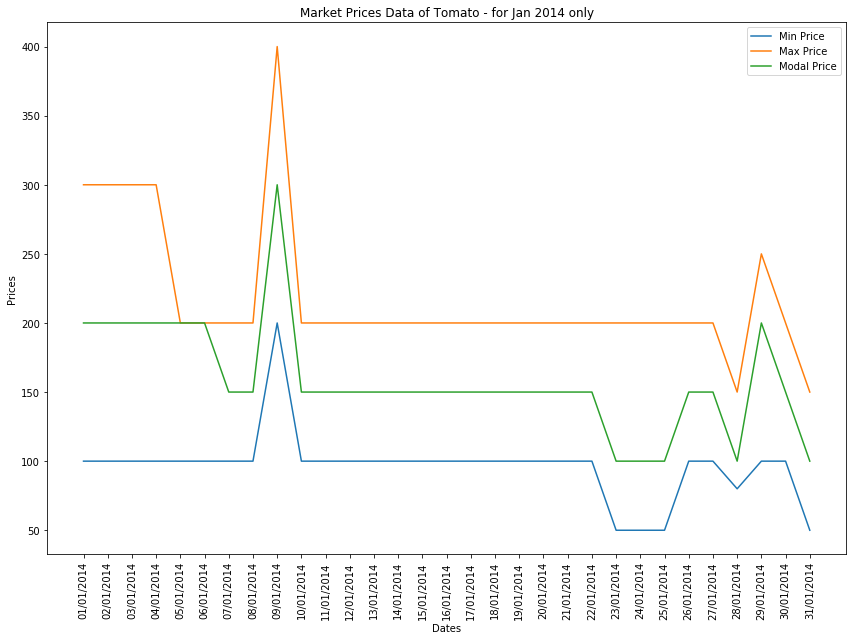

In [86]:
q1(df_q1)

## Preprocessing to get final DataFrame for Ques-2

In [88]:
def preprocess_q2(df):
#     del df['District']
#     del df['Market']
#     del df['Commodity']
#     del df['Variety']
#     del df['Arrival_Date']
#     del df['Day']
#     del df['Month']
    df['Min_x0020_Price'] = df['Min_x0020_Price'].astype(int)
    df['Max_x0020_Price'] = df['Max_x0020_Price'].astype(int)
    df['Modal_x0020_Price'] = df['Modal_x0020_Price'].astype(int)
    return df

In [89]:
df_q2 = preprocess_q2(df_q2)

## Function for creating graph for Ques-2

In [90]:
def q2(df):
    val = df_q2.groupby(['Season', 'Year'])["Min_x0020_Price"].mean().unstack('Year')
    ax = val.plot(kind='bar', 
                  stacked=False, 
                  figsize=(15.0, 10.0), 
                  title=("Prices of Tomato by Season & Year for AP"), 
                  legend=True, 
                  color = ['r','g','b'])
    ax.set_xlabel("Seasons")
    ax.set_ylabel("Mean Price")

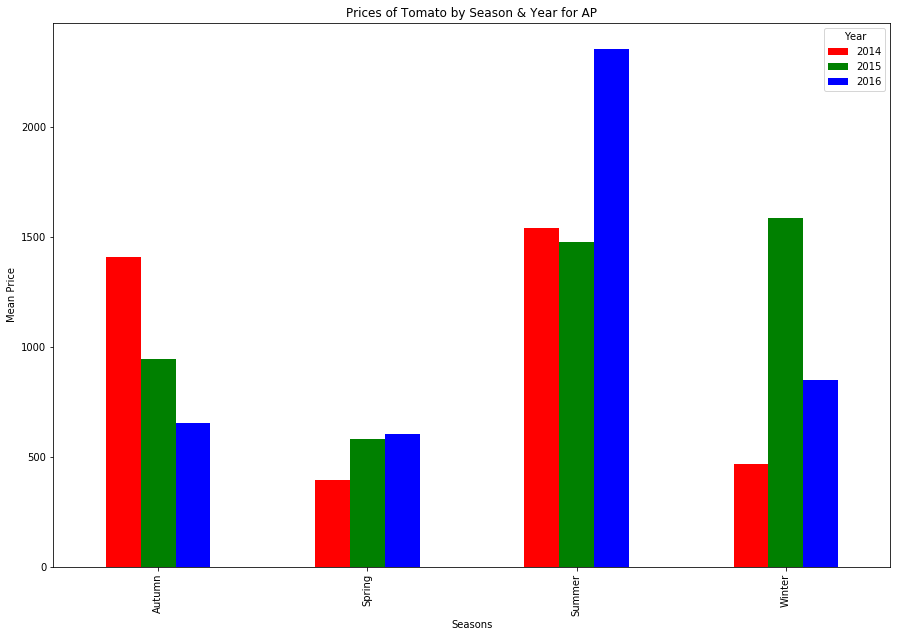

In [91]:
q2(df_q2)